<a href="https://colab.research.google.com/github/Snaiyer1/MAT_421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numerical Grids in Python

A numerical grid is an evenly spaced set of points over the domain of a function (i.e., the independent variable), over some interval. The spacing or step size of a numerical grid is the distance between adjacent points on the grid. For the purpose of this text, if $x$ is a numerical grid, then $x_j$ is the $j^{th}$ point in the numerical grid and $h$ is the spacing between $x_{j-1}$ and $x_j$.

There are several functions in Python that can be used to generate numerical grids. For numerical grids in one dimension, it is sufficient to use the **linespace** function.

In Python, a function $f(x)$ can be represented over an interval by computing its value on a grid. Although the function itself may be continuous, this discrete or discretized representation is useful for numerical calculations and corresponds to data sets that may be acquired in engineering and science practice. Specifically, the function value may only be known at discrete points.

A temperature sensor may deliver temperature versus time pairs at regular time intervals. Although temperature is a smooth and continuous function of time, the sensor only provides values at discrete time intervals, and in this particular case, the underlying function would not even be known.

Whether $f$ is an analytic function or a discrete representation of one, we would like to derive methods of approximating the derivative of $f$ over a numerical grid and determine their accuracy:

Numerical Grid (x): [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Step Size (h): 1.0


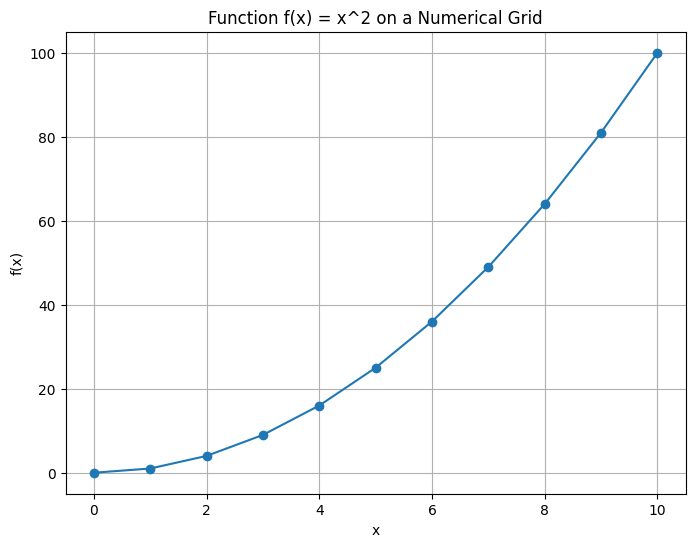

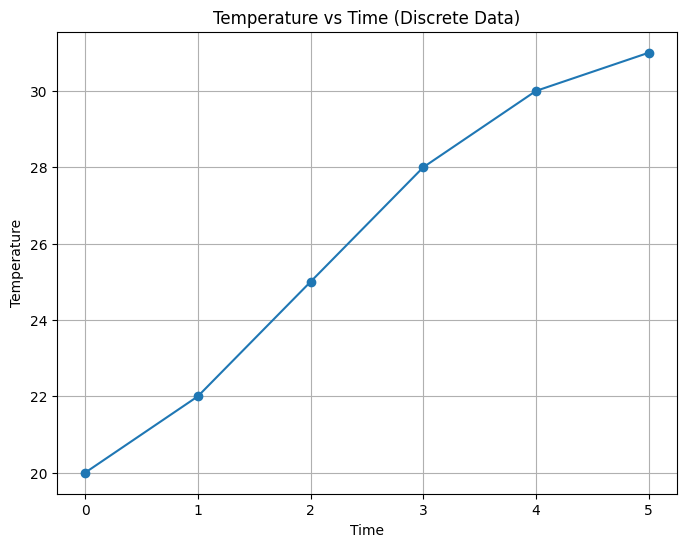

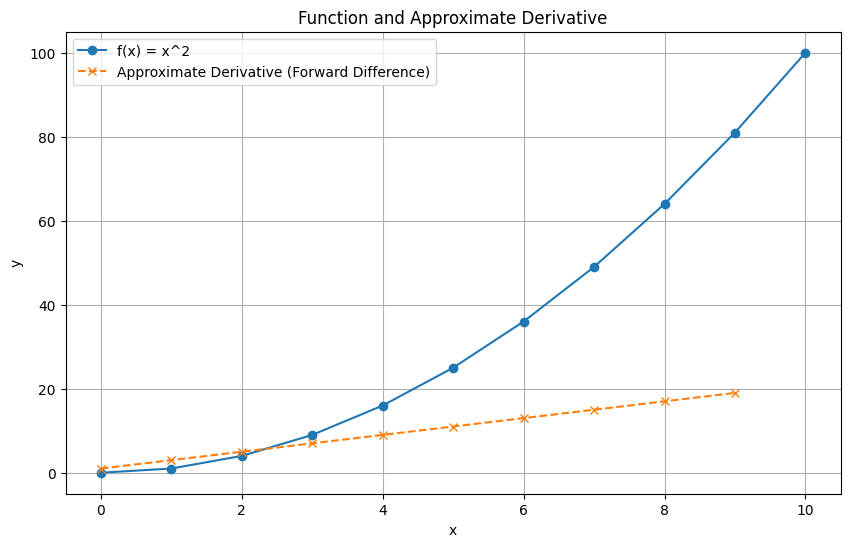

In [1]:
import numpy as np
import matplotlib.pyplot as plt

start = 0
end = 10
num_points = 11

x = np.linspace(start, end, num_points)
h = x[1] - x[0]

print("Numerical Grid (x):", x)
print("Step Size (h):", h)

def f(x):
  return x**2

y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title("Function f(x) = x^2 on a Numerical Grid")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

time = np.linspace(0, 5, 6)
temperature = [20, 22, 25, 28, 30, 31]

plt.figure(figsize=(8,6))
plt.plot(time, temperature, marker='o', linestyle='-')
plt.title("Temperature vs Time (Discrete Data)")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

def forward_difference(f, x, h):
  """Approximates the first derivative using forward difference."""
  derivative = (f(x + h) - f(x)) / h
  return derivative

x_derivative = x[:-1]
y_derivative_approx = forward_difference(f, x[:-1], h)

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', label='f(x) = x^2')
plt.plot(x_derivative, y_derivative_approx, marker='x', linestyle='--', label='Approximate Derivative (Forward Difference)')
plt.title("Function and Approximate Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

###Finite Difference Approximating Derivatives

The derivative f′(x) of a function f(x) at the point x=a is defined as:

f′(a)=lim (x→a) [f(x)−f(a)] / (x−a)

The derivative at x=a is the slope at this point. In finite difference approximations of this slope, we can use values of the function in the neighborhood of the point x=a to achieve the goal. There are various finite difference formulas used in different applications, and three of these, where the derivative is calculated using the values of two points, are presented below.

The **forward difference** is to estimate the slope of the function at xj using the line that connects (xj,f(xj)) and (xj+1,f(xj+1)):

f′(xj) = [f(xj+1)−f(xj)] / (xj+1−xj)

The **backward difference** is to estimate the slope of the function at xj using the line that connects (xj−1,f(xj−1)) and (xj,f(xj)):

f′(xj) = [f(xj)−f(xj−1)] / (xj−xj−1)

The **central difference** is to estimate the slope of the function at xj using the line that connects (xj−1,f(xj−1)) and (xj+1,f(xj+1)):

f′(xj) = [f(xj+1)−f(xj−1)] / (xj+1−xj−1)


To derive an approximation for the derivative of f, we return to Taylor series. For an arbitrary function f(x) the Taylor series of f around a=xj is:

f(x) = f(xj) * [(x−xj)^0 / 0!] + f′(xj) * [(x−xj)^1 / 1!] + f′′(xj) * [(x−xj)^2 / 2!] + f′′′(xj) * [(x−xj)^3 / 3!] + ...

If x is on a grid of points with spacing h, we can compute the Taylor series at x=xj+1 to get:

f(xj+1) = f(xj) * [(xj+1−xj)^0 / 0!] + f′(xj) * [(xj+1−xj)^1 / 1!] + f′′(xj) * [(xj+1−xj)^2 / 2!] + f′′′(xj) * [(xj+1−xj)^3 / 3!] + ...

Substituting h=xj+1−xj and solving for f′(xj) gives the equation:

f′(xj) = [f(xj+1)−f(xj)] / h + (−f′′(xj) * h / 2! − f′′′(xj) * h^2 / 3! − ...).

The terms that are in parentheses, −f′′(xj) * h / 2! − f′′′(xj) * h^2 / 3! − ..., are called higher order terms of h. The higher order terms can be rewritten as:

−f′′(xj) * h / 2! − f′′′(xj) * h^2 / 3! − ... = h * (α+ϵ(h)),

where α is some constant, and ϵ(h) is a function of h that goes to zero as h goes to 0. You can verify with some algebra that this is true. We use the abbreviation “O(h)” for h * (α+ϵ(h)), and in general, we use the abbreviation “O(h^p)” to denote h^p * (α+ϵ(h)).

Substituting O(h) into the previous equations gives:

f′(xj) = [f(xj+1)−f(xj)] / h + O(h).

This gives the forward difference formula for approximating derivatives as:

f′(xj) ≈ [f(xj+1)−f(xj)] / h,

and we say this formula is O(h).

Here, O(h) describes the accuracy of the forward difference formula for approximating derivatives. For an approximation that is O(h^p), we say that p is the order of the accuracy of the approximation. With few exceptions, higher order accuracy is better than lower order. To illustrate this point, assume q<p. Then as the spacing, h>0, goes to 0, h^p goes to 0 faster than h^q. Therefore as h goes to 0, an approximation of a value that is O(h^p) gets closer to the true value faster than one that is O(h^q).

By computing the Taylor series around a=xj at x=xj−1 and again solving for f′(xj), we get the backward difference formula:

f′(xj) ≈ [f(xj)−f(xj−1)] / h,

which is also O(h). You should try to verify this result on your own.

Intuitively, the forward and backward difference formulas for the derivative at xj are just the slopes between the point at xj and the points xj+1 and xj−1, respectively.

We can construct an improved approximation of the derivative by clever manipulation of Taylor series terms taken at different points. To illustrate, we can compute the Taylor series around a=xj at both xj+1 and xj−1. Written out, these equations are:

f(xj+1) = f(xj) + f′(xj) * h + (1/2) * f′′(xj) * h^2 + (1/6) * f′′′(xj) * h^3 + ...

and

f(xj−1) = f(xj) − f′(xj) * h + (1/2) * f′′(xj) * h^2 − (1/6) * f′′′(xj) * h^3 + ...

Subtracting the formulas above gives:

f(xj+1) − f(xj−1) = 2 * f′(xj) * h + (2/3) * f′′′(xj) * h^3 + ...,

which when solved for f′(xj) gives the central difference formula:

f′(xj) ≈ [f(xj+1)−f(xj−1)] / (2*h).

Because of how we subtracted the two equations, the h terms canceled out; therefore, the central difference formula is O(h^2), even though it requires the same amount of computational effort as the forward and backward difference formulas! Thus the central difference formula gets an extra order of accuracy for free. In general, formulas that utilize symmetric points around xj, for example xj−1 and xj+1, have better accuracy than asymmetric ones, such as the forward and backward difference formulas.

The following figure shows the forward difference (line joining (xj,yj) and (xj+1,yj+1)), backward difference (line joining (xj,yj) and (xj−1,yj−1)), and central difference (line joining (xj−1,yj−1) and (xj+1,yj+1)) approximation of the derivative of a function f. As can be seen, the difference in the value of the slope can be significantly different based on the size of the step h and the nature of the function.

Lets try to compute the Taylor series of f around a=xj and compute the series at x=xj−2, xj−1, xj+1, xj+2 and show that the resulting equations can be combined to form an approximation for f′(xj) that is O(h^4).

First, we compute the Taylor series at the specified points.

f(xj−2) = f(xj) − 2hf′(xj) + 4h^2f′′(xj)/2 − 8h^3f′′′(xj)/6 + 16h^4f′′′′(xj)/24 − 32h^5f′′′′′(xj)/120 + ...
f(xj−1) = f(xj) − hf′(xj) + h^2f′′(xj)/2 − h^3f′′′(xj)/6 + h^4f′′′′(xj)/24 − h^5f′′′′′(xj)/120 + ...
f(xj+1) = f(xj) + hf′(xj) + h^2f′′(xj)/2 + h^3f′′′(xj)/6 + h^4f′′′′(xj)/24 + h^5f′′′′′(xj)/120 + ...
f(xj+2) = f(xj) + 2hf′(xj) + 4h^2f′′(xj)/2 + 8h^3f′′′(xj)/6 + 16h^4f′′′′(xj)/24 + 32h^5f′′′′′(xj)/120 + ...

To get the h^2, h^3, and h^4 terms to cancel out, then we can compute:

f(xj−2) − 8f(xj−1) + 8f(xj+1) − f(xj+2) = 12hf′(xj) − 48h^5f′′′′′(xj)/120

which can be rearranged to:

f′(xj) = [f(xj−2) − 8f(xj−1) + 8f(xj+1) − f(xj+2)] / (12*h) + O(h^4).

This formula is a better approximation for the derivative at xj than the central difference formula, but requires twice as many calculations.

nt elements in the initial array f. In other words d(i)=f(i+1)−f(i).


Lets consider the function f(x)=cos(x). We know the derivative of cos(x) is −sin(x). The following code computes the derivatives numerically:

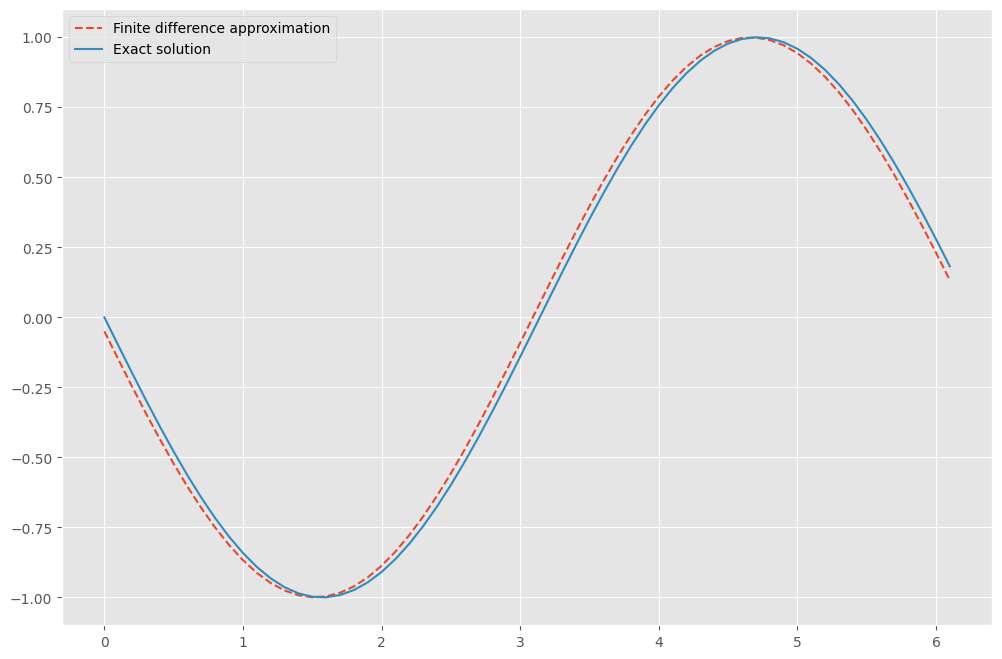

0.049984407218554114


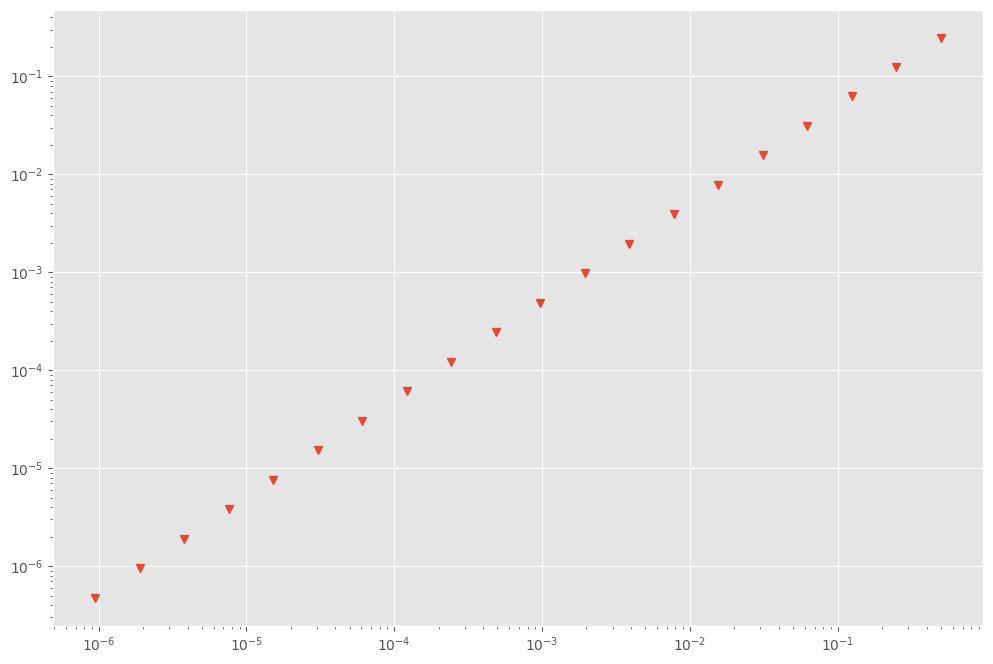

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
h = 0.1
x = np.arange(0, 2*np.pi, h)
y = np.cos(x)
forward_diff = np.diff(y)/h
x_diff = x[:-1:]
exact_solution = -np.sin(x_diff)
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, label = 'Exact solution')
plt.legend()
plt.show()
max_error = max(abs(exact_solution - forward_diff))
print(max_error)
h = 1
iterations = 20
step_size = []
max_error = []
for i in range(iterations):
    h /= 2
    step_size.append(h)
    x = np.arange(0, 2 * np.pi, h)
    y = np.cos(x)
    forward_diff = np.diff(y)/h
    x_diff = x[:-1]
    exact_solution = -np.sin(x_diff)
    max_error.append(max(abs(exact_solution - forward_diff)))
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

###Approximating of Higher Order Derivatives

It also possible to use Taylor series to approximate higher order derivatives (e.g., f′′(xj),f′′′(xj), etc.). For example, taking the Taylor series around a=xj and then computing it at x=xj−1 and xj+1 gives

f(xj−1)=f(xj)−hf′(xj)+h2f′′(xj)/2−h3f′′′(xj)/6+⋯

and

f(xj+1)=f(xj)+hf′(xj)+h2f′′(xj)/2+h3f′′′(xj)/6+⋯.

If we add these two equations together, we get

f(xj−1)+f(xj+1)=2f(xj)+h2f′′(xj)+h4f′′′′(xj)/24+⋯,

and with some rearrangement gives the approximation f′′(xj)≈[f(xj+1)−2f(xj)+f(xj−1)]/h2, and is O(h^2):

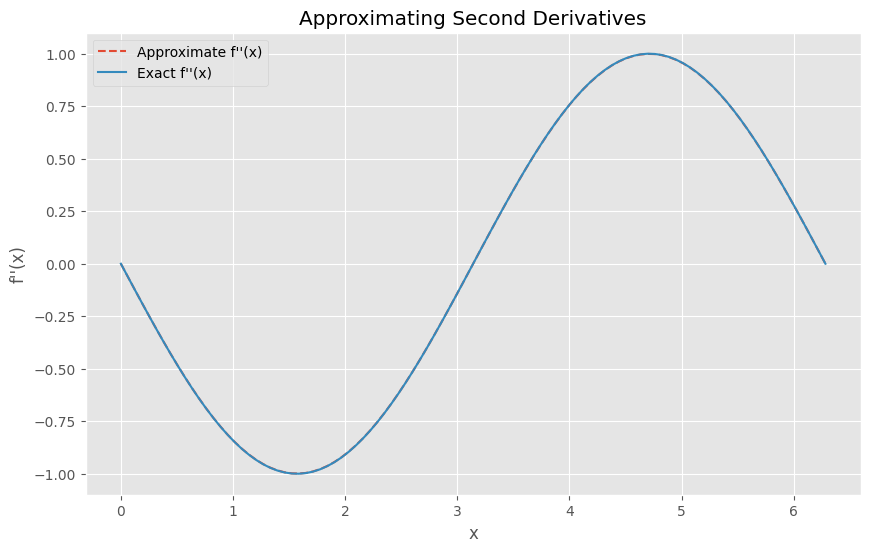

Maximum error: 0.0008329507465131281


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def second_derivative(f, x, h):
    """Approximates the second derivative of f at x using central difference."""
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

def f(x):
    return np.sin(x)

x_values = np.linspace(0, 2 * np.pi, 100)
h = 0.1

approx_second_derivatives = second_derivative(f, x_values, h)
exact_second_derivatives = -np.sin(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, approx_second_derivatives, '--', label='Approximate f\'\'(x)')
plt.plot(x_values, exact_second_derivatives, label='Exact f\'\'(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.title('Approximating Second Derivatives')
plt.grid(True)
plt.show()

error = np.max(np.abs(approx_second_derivatives - exact_second_derivatives))
print(f"Maximum error: {error}")

###Numerical Differentiation with Noise
Sometimes, the function f is given as a vector of function values corresponding to independent data values in another vector x, which is gridded. This data can be contaminated with noise, meaning its value is slightly off from what it would be if computed from a pure mathematical function. This often occurs in engineering due to inaccuracies in measurement devices or perturbations outside the system of interest.

We numerically compute the derivative of a simple cosine wave corrupted by a small sine wave. Consider the following two functions:

f(x) = cos(x)

and

fϵ,ω(x) = cos(x) + ϵsin(ωx)

where 0 < ϵ ≪ 1 is a very small number and ω is a large number. When ϵ is small, f ≈ fϵ,ω. We plot fϵ,ω(x) for ϵ=0.01 and ω=100, and observe its similarity to f(x) in the following figure:

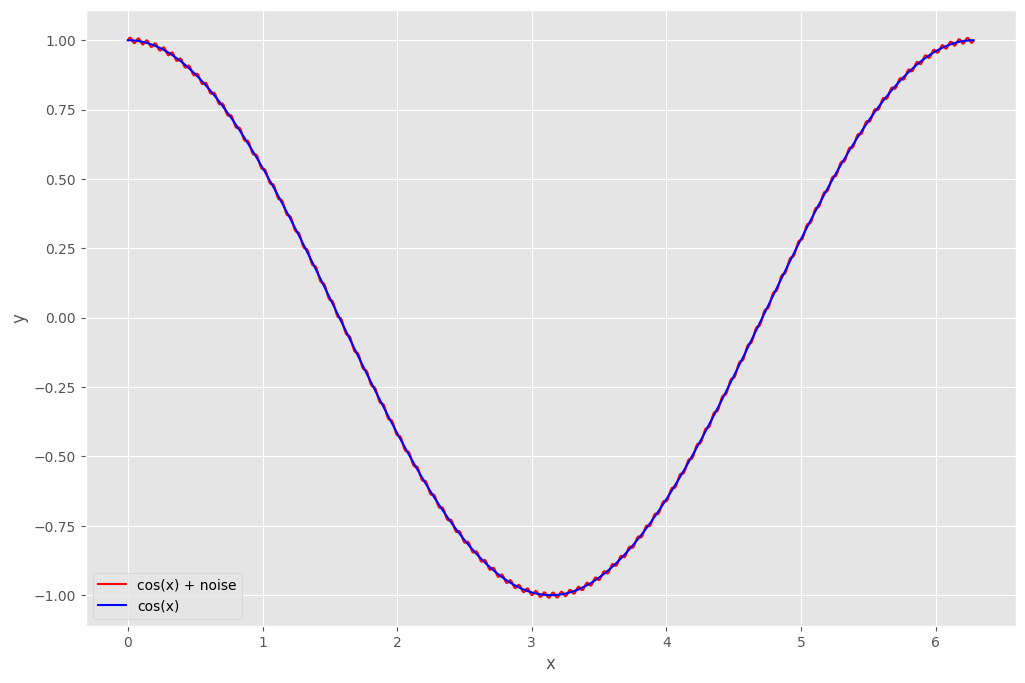

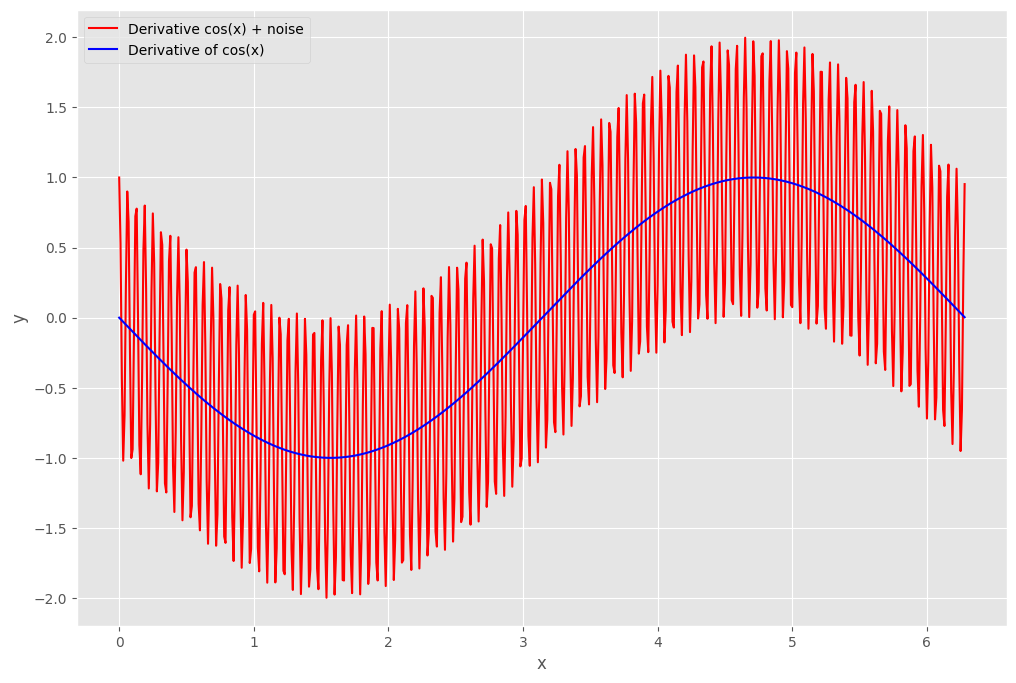

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = np.arange(0, 2*np.pi, 0.01)
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', label = 'cos(x) + noise')
plt.plot(x, y, 'b-', label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

x = np.arange(0, 2*np.pi, 0.01)
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()